In [1]:
#importing packages
import re
import numpy as np
import pandas as pd
#plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#nltk
from nltk.stem import WordNetLemmatizer
#sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING="ISO=8859-1"
df=pd.read_csv('training.1600000.processed.noemoticon.csv',
              encoding=DATASET_ENCODING,names=DATASET_COLUMNS)
#training.1600000.processed.noemoticon.csv

In [3]:
df.sample(5)

,target,ids,date,flag,user,text
243783,0,1981623043,Sun May 31 09:32:45 PDT 2009,NO_QUERY,BlackPurple4evr,MTV movie awards r on tonight!!! cant wait. st...
153321,0,1932931675,Tue May 26 22:33:55 PDT 2009,NO_QUERY,nendz,@_crislyn and who's this? and bakit wala si ba...
628978,0,2231482198,Thu Jun 18 18:36:33 PDT 2009,NO_QUERY,adhaaL,@gullahisland OMG! Are your serious? i thought...
199501,0,1971453365,Sat May 30 07:08:54 PDT 2009,NO_QUERY,megangia,Morning.. busy work to do all day
1277056,4,2001279039,Tue Jun 02 00:22:32 PDT 2009,NO_QUERY,HollyAJarrett,makes me wonder if the three years were actual...


In [4]:
#exploratory data analysis
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
#columns and features in data
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [6]:
#length of the dataset
print('length of data is',len(df))

length of data is 1600000


In [7]:
#shape of data
df.shape

(1600000, 6)

In [8]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
#datatypes of all columns
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [10]:
#checking for null values
np.sum(df.isnull().any(axis=1))

0

In [11]:
#ros and columns in the dataset
print('Count of columns in the data is: ',len(df.columns))
print('Count of rows in the data is: ', len(df))

Count of columns in the data is:  6
Count of rows in the data is:  1600000


In [12]:
#check unique target values
df['target'].unique()

array([0, 4], dtype=int64)

In [13]:
#check the number of target values
df['target'].nunique()

2

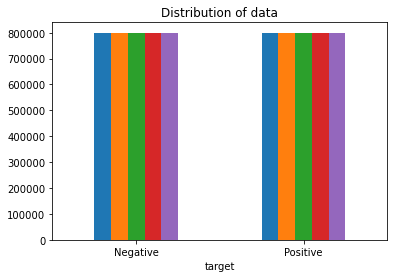

In [14]:
#data visualization of target variables
#plotting the distribution for dataset
ax=df.groupby('target').count().plot(kind='bar',title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'],rotation=0)
#storing data in lists
text,sentiment=list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

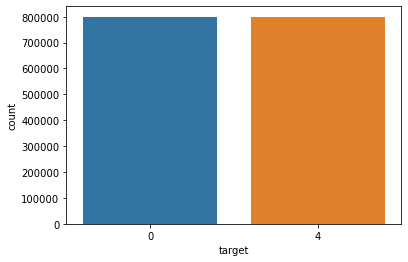

In [15]:
import seaborn as sns
sns.countplot(x='target',data=df)

In [16]:
#data preprocessing
#selecting text and target for analysis
data=df[['text','target']]

In [17]:
#assigning 1 to positive sentiment
data['target']=data['target'].replace(4,1)

<ipython-input-17-84ebd6d6b30d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']=data['target'].replace(4,1)


In [18]:
data['target'].unique()

array([0, 1], dtype=int64)

In [19]:
#separating positive and negative tweets
data_pos=data[data['target']==1]
data_neg=data[data['target']==0]

In [20]:
#taking one fourth of data so we can run our machine easy
data_pos=data_pos.iloc[:int(20000)]
data_neg=data_neg.iloc[:int(20000)]

In [21]:
#combining positive and negative tweets
dataset=pd.concat([data_pos,data_neg])

In [22]:
#making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [23]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [24]:
#cleaning and removing the above stop words list from
#the tweet text
STOPWORDS=set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text']=dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [25]:
#cleaning and removing punctuations
import string
english_punctuations=string.punctuation
punctuations_list=english_punctuations
def cleaning_punctuations(text):
    translator=str.maketrans('','',punctuations_list)
    return text.translate(translator)
dataset['text']=dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [26]:
#cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+',r'1',text)
dataset['text']=dataset['text'].apply(lambda x:cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [27]:
#cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)
dataset['text']=dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [28]:
#getting tokenization of tweet text
#from nltk.tokenize import RegexpTokenizer
#tokenizer=RegexpTokenizer(r'w+')
#dataset['text']=dataset['text'].apply(tokenizer.tokenize)
#dataset['text'].head()

In [29]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [30]:
#from nltk.tokenize import RegexpTokenizer
#s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
#tokenizer = RegexpTokenizer(r'\w+')
#|\$[\d\.]+|\S+
#tokenizer.tokenize(s)

In [31]:
#applying stemming
import nltk
st=nltk.PorterStemmer()
def stemming_on_text(data):
    text=[st.stem(word) for word in data]
    return data
dataset['text']=dataset['text'].apply(lambda x:stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [32]:
#applying Lemmatizer
lm=nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text=[lm.lemmatize(word) for word in data]
    return data
dataset['text']=dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [33]:
#import nltk
#nltk.download('wordnet')

In [34]:
#separating input feature and label
X=data.text
y=data.target
X

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

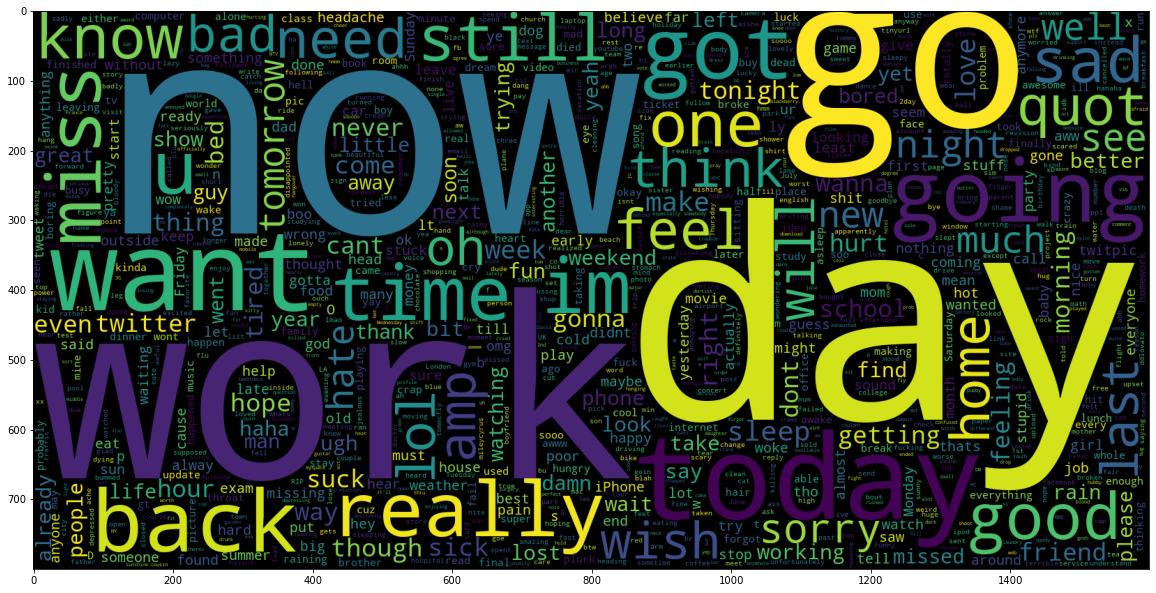

In [35]:
#word cloud for negative tweets
data_neg=data['text'][:800000]
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800,
            collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

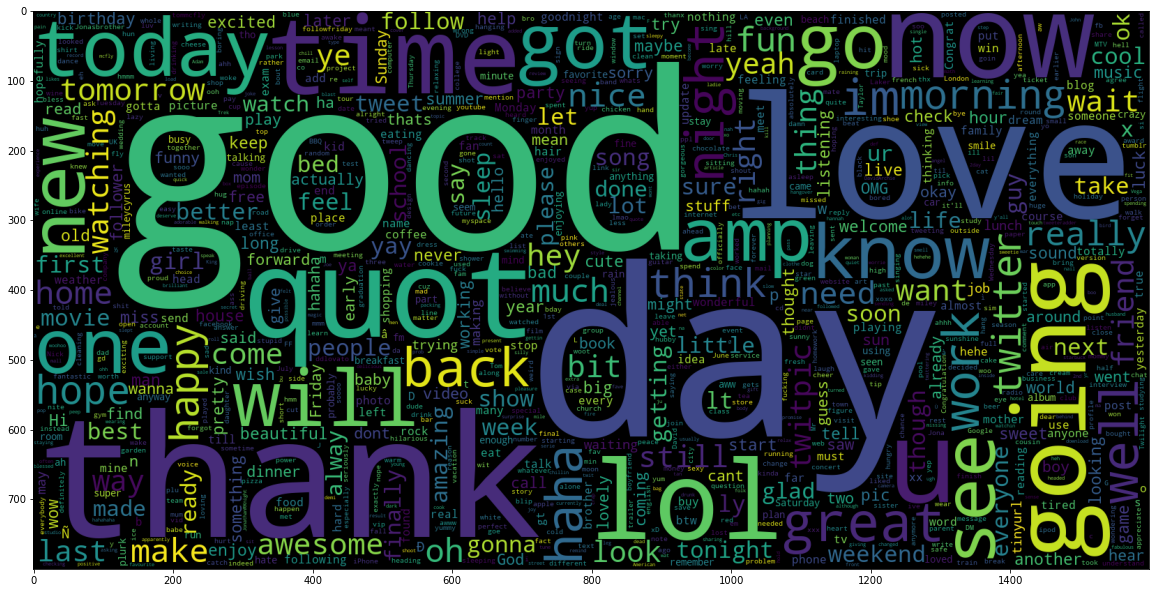

In [36]:
#plot word cloud for positive tweets
data_pos=data['text'][800000:]
wc=WordCloud(max_words=1000,width=1600,height=800,
            collocations=False).generate(" ".join(data_pos))
plt.figure(figsize=(20,20))
plt.imshow(wc)

In [37]:
#splitting our data into train and test subset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=26105111)


In [38]:
#transformig data set using idf vectorizer
#fit the tf-idf vectorizer
vectoriser=TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ',len(vectoriser.get_feature_names()))


No. of feature_words:  500000


In [39]:
#transforming the data using tf-idf vectorizer
X_train=vectoriser.transform(X_train)
X_test=vectoriser.transform(X_test)

In [40]:
X_test

<80000x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 1563076 stored elements in Compressed Sparse Row format>

In [41]:
#function for model evaluation
#accuracy score, confusion matrix with plot, roc-auc curve
def model_Evaluate(model):
    #predict values for test dataset
    y_pred=model.predict(X_test)
    #print the evaluation metrics for the dataset
    print(classification_report(y_test,y_pred))
    #compute and plot the confusion matrix
    cf_matrix=confusion_matrix(y_test,y_pred)
    categories=['Negative','Positive']
    group_names=['True Neg','False Pos','False Neg','Tru Pos']
    group_percentages=['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels=[f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels=np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix,annot=labels,cmap='Blues',fmt='',
               xticklabels=categories,yticklabels=categories)
    plt.xlabel("Predicted values",fontdict={'size':14},labelpad=10)
    plt.ylabel("Actual values",fontdict={'size':14},labelpad=10)
    plt.title("Confusion Matrix",fontdict={'size':18},pad=20)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



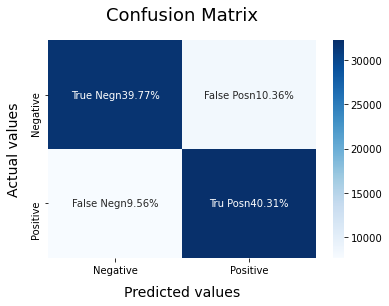

In [42]:
#model building
#bernoulli naive bayes, svm, Logistic Regression
BNBmodel=BernoulliNB()
BNBmodel.fit(X_train,y_train)
model_Evaluate(BNBmodel)
y_pred1=BNBmodel.predict(X_test)

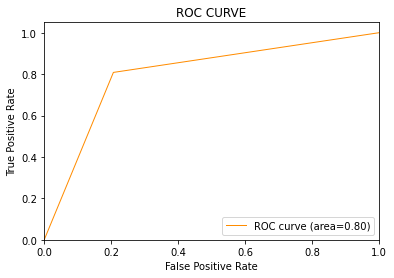

In [43]:
#plot the roc-auc curve for model 1
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred1)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=1,label='ROC curve (area=%0.2f)' % roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



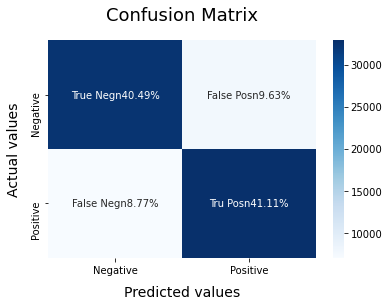

In [44]:
#model 2
SVCmodel=LinearSVC()
SVCmodel.fit(X_train,y_train)
model_Evaluate(SVCmodel)
y_pred2=SVCmodel.predict(X_test)

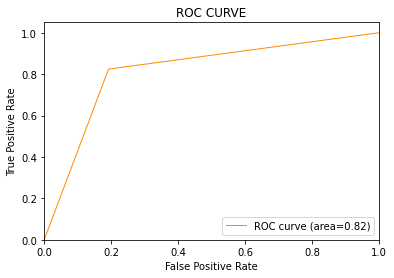

In [45]:
#plot the roc_auc curve for model 2
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds=roc_curve(y_test,y_pred2)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=1,label='ROC curve (area=%0.2f)' %roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



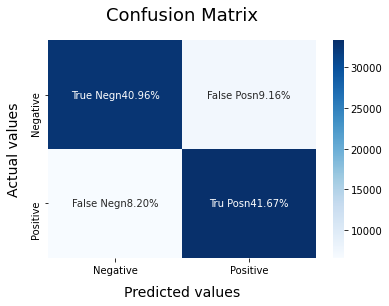

In [46]:
#model 3
LRmodel=LogisticRegression(C=2,max_iter=1000,n_jobs=-1)
LRmodel.fit(X_train,y_train)
model_Evaluate(LRmodel)
y_pred3=LRmodel.predict(X_test)

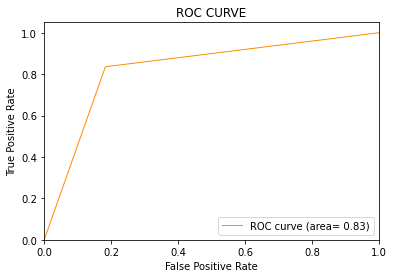

In [47]:
#plot the roc-auc curve for model 3
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred3)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=1,label='ROC curve (area= %0.2f)' %roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

In [49]:
dataset=pd.read_csv("ruto original.csv")
dataset.head()

,target,ids,created,user,text
0,NaN,1,31/03/2022 06:54,Michael27840229,@DominicOmondiO Electing Ruto will be Kenyan...
1,NaN,2,31/03/2022 06:54,Eutie7Eutie,@Murathe_David_ Murathe Anza kuzoea Rais wako ...
2,NaN,3,31/03/2022 06:53,teumarkets,"teuask~ drop wl applew00d 2.0 kalian dong, sel..."
3,NaN,4,31/03/2022 06:53,phineasmuthomi1,Ruto want to fix kenya's economy. But he can't...
4,NaN,5,31/03/2022 06:53,Tuendete,If Raila had formed a coalition with Ruto he w...


In [50]:
#turning to lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()


8304                        @councillornjohi ruto the 5th
8305    the william samoei ruto effect on the ground h...
8306    ruto has been opposing everything that is mean...
8307    on august 12th 2020, ruto asked kenyans to sta...
8308    william ruto�s fake projects have left a hot n...
Name: text, dtype: object

In [51]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [52]:
#cleaning and removing the above stop words list from
#the tweet text
STOPWORDS=set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text']=dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    @dominicomondio electing ruto kenyans biggest ...
1    @murathe_david_ murathe anza kuzoea rais wako ...
2    teuask~ drop wl applew00d 2.0 kalian dong, sel...
3    ruto want fix kenya's economy. but can't fix e...
4    raila formed coalition ruto would https://t.co...
Name: text, dtype: object

In [55]:
#cleaning and removing punctuations
import string
english_punctuations=string.punctuation
punctuations_list=english_punctuations
def cleaning_punctuations(text):
    translator=str.maketrans('','',punctuations_list)
    return text.translate(translator)
dataset['text']=dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

8304                             councillornjohi ruto 5th
8305    william samoei ruto effect ground seen politic...
8306    ruto opposing everything meant benefit kenyans...
8307    august 12th 2020 ruto asked kenyans stay firm ...
8308    william ruto�s fake projects left hot nail wou...
Name: text, dtype: object

In [56]:
#cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+',r'1',text)
dataset['text']=dataset['text'].apply(lambda x:cleaning_repeating_char(x))
dataset['text'].tail()

8304                             councillornjohi ruto 5th
8305    william samoei ruto effect ground seen politic...
8306    ruto opposing everything meant benefit kenyans...
8307    august12th 2020 ruto asked kenyans stay firm a...
8308    william ruto�s fake projects left hot nail wou...
Name: text, dtype: object

In [57]:
#cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)
dataset['text']=dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

8304                              councillornjohi ruto th
8305    william samoei ruto effect ground seen politic...
8306    ruto opposing everything meant benefit kenyans...
8307    augustth  ruto asked kenyans stay firm against...
8308    william ruto�s fake projects left hot nail wou...
Name: text, dtype: object

In [58]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

0    [dominicomondio, electing, ruto, kenyans, bigg...
1    [murathedavid, murathe, anza, kuzoea, rais, wa...
2    [teuask, drop, wl, applewd, kalian, dong, sela...
3    [ruto, want, fix, kenyas, economy, but, cant, ...
4    [raila, formed, coalition, ruto, would, httpst...
Name: text, dtype: object

In [59]:
#applying stemming
import nltk
st=nltk.PorterStemmer()
def stemming_on_text(data):
    text=[st.stem(word) for word in data]
    return data
dataset['text']=dataset['text'].apply(lambda x:stemming_on_text(x))
dataset['text'].head()

0    [dominicomondio, electing, ruto, kenyans, bigg...
1    [murathedavid, murathe, anza, kuzoea, rais, wa...
2    [teuask, drop, wl, applewd, kalian, dong, sela...
3    [ruto, want, fix, kenyas, economy, but, cant, ...
4    [raila, formed, coalition, ruto, would, httpst...
Name: text, dtype: object

In [60]:
#applying Lemmatizer
lm=nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text=[lm.lemmatize(word) for word in data]
    return data
dataset['text']=dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

0    [dominicomondio, electing, ruto, kenyans, bigg...
1    [murathedavid, murathe, anza, kuzoea, rais, wa...
2    [teuask, drop, wl, applewd, kalian, dong, sela...
3    [ruto, want, fix, kenyas, economy, but, cant, ...
4    [raila, formed, coalition, ruto, would, httpst...
Name: text, dtype: object

In [64]:
ruto=pd.read_csv("ruto original.csv")
X2=ruto.text
X2

0       @DominicOmondiO Electing  Ruto will be  Kenyan...
1       @Murathe_David_ Murathe Anza kuzoea Rais wako ...
2       teuask~ drop wl applew00d 2.0 kalian dong, sel...
3       Ruto want to fix kenya's economy. But he can't...
4       If Raila had formed a coalition with Ruto he w...
                              ...                        
8304                        @CouncillorNjohi Ruto the 5th
8305    The William Samoei Ruto effect on the ground h...
8306    Ruto has been opposing everything that is mean...
8307    On August 12th 2020, Ruto asked Kenyans to sta...
8308    William Ruto�s fake projects have left a hot n...
Name: text, Length: 8309, dtype: object

In [65]:
X_test2=vectoriser.transform(X2)

In [66]:
y_pred4=LRmodel.predict(X_test2)
y_pred4.to_csv

In [69]:
y_pred4
X_test2

<8309x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 128742 stored elements in Compressed Sparse Row format>

In [70]:
arr = np.concatenate((X2, y_pred4))

print(arr)

['@DominicOmondiO Electing  Ruto will be  Kenyans biggest  mistake. I wish kenyans can see beyond the fog and elect the right person.'
 '@Murathe_David_ Murathe Anza kuzoea Rais wako mapema.Ruto is the next  project https://t.co/7WKtARk14L'
 'teuask~ drop wl applew00d 2.0 kalian dong, selain ruto ya. Kali aja ad yg tawarin'
 ... 1 1 0]


In [71]:
y_pred4.to_csv("ruto y.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [72]:
import pandas as pd 
pd.DataFrame(y_pred4).to_csv("ruto y.csv")

In [1]:
#copy
